In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets

from copy import deepcopy
# from utils import *
from nn_building_blocks import *

%matplotlib inline

### Batch Gradient Decsent

In [2]:
# def update_parameters_with_gd(parameters, grads, learning_rate):
#     L = len(parameters)//2

#     for l in range(1, L+1):
#         parameters["W"+str(l)] = parameters["W"+str(l)] - (learning_rate * grads["dW"+str(l)])
#         parameters["b"+str(l)] = parameters["b"+str(l)] - (learning_rate * grads["db"+str(l)])

#     return parameters

### Random Mini-Batch Gradient Descent

In [3]:
# def random_mini_batches(X, Y, mini_batch_size=64, seed=0):
#     np.random.seed(seed)
#     m = X.shape[1]
#     mini_batches = []
#     Y = Y.reshape(1, m)

#     permutation = list(np.random.permutation(m))
#     shuffled_X = X[:, permutation]
#     shuffled_Y = Y[:, permutation]

#     total_mini_batches = math.floor(m/mini_batch_size)

#     for k in range(total_mini_batches):
#         batch_X = shuffled_X[:, k*mini_batch_size:((k+1)*mini_batch_size)]
#         batch_Y = shuffled_Y[:, k*mini_batch_size:((k+1)*mini_batch_size)]
        
#         mini_batch = (batch_X, batch_Y)
#         mini_batches.append(mini_batch)

#     if m % mini_batch_size != 0:
#         j = (m % mini_batch_size)
#         last_batch_X = shuffled_X[:, -j:]
#         last_batch_Y = shuffled_Y[:, -j:]
        
#         last_mini_batch = (last_batch_X, last_batch_Y)
#         mini_batches.append(last_mini_batch)
#     return mini_batches

### Momentum

In [4]:
# def initialize_velocity(parameters):
#     L = len(parameters)//2
#     v = {}

#     for l in range(1, L+1):
#         v["dW"+str(l)] = np.zeros(parameters["W"+str(l)].shape)
#         v["db"+str(l)] = np.zeros(parameters["b"+str(l)].shape)

#     return v

In [5]:
# def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
#     L=len(parameters)//2

#     for l in range(1, L+1):
#         v["dW"+str(l)] = (beta*v["dW"+str(l)]) + ((1-beta)*grads["dW"+str(l)])
#         parameters["W"+str(l)] = parameters["W"+str(l)] - (learning_rate * v["dW"+str(l)])
#         v["db"+str(l)] = (beta*v["db"+str(l)]) + ((1-beta)*grads["db"+str(l)])
#         parameters["b"+str(l)] = parameters["b"+str(l)] - (learning_rate * v["db"+str(l)])

#     return parameters, v

### Adam Optimizer

In [6]:
# def initialize_adam(parameters):
#     L = len(parameters)//2
#     v = {}
#     s = {}

#     for l in range(1, L+1):
#         v["dW"+str(l)] = np.zeros(parameters["W"+str(l)].shape)
#         s["dW"+str(l)] = np.zeros(parameters["W"+str(l)].shape)
#         v["db"+str(l)] = np.zeros(parameters["b"+str(l)].shape)
#         s["db"+str(l)] = np.zeros(parameters["b"+str(l)].shape)

#     return v, s

In [7]:
# def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate= 0.01, beta1=0.9, beta2=0.999, epsilon= 1e-8):
#     L = len(parameters)//2
#     v_corrected = {}
#     s_corrected = {}

#     for l in range(1, L+1):
#         v["dW"+str(l)] = (beta1*v["dW"+str(l)]) + ((1-beta1)*grads["dW"+str(l)])
#         v["db"+str(l)] = (beta1*v["db"+str(l)]) + ((1-beta1)*grads["db"+str(l)])

#         v_corrected["dW"+str(l)] = v["dW"+str(l)] / (1-(beta1)**t)
#         v_corrected["db"+str(l)] = v["db"+str(l)] / (1-(beta1)**t)
        
#         s["dW"+str(l)] = (beta2*s["dW"+str(l)]) + ((1-beta2)*grads["dW"+str(l)]**2)
#         s["db"+str(l)] = (beta2*s["db"+str(l)]) + ((1-beta2)*grads["db"+str(l)]**2)

#         s_corrected["dW"+str(l)] = s["dW"+str(l)] / (1-(beta2)**t)
#         s_corrected["db"+str(l)] = s["db"+str(l)] / (1-(beta2)**t)

#         parameters["W"+str(l)] = parameters["W"+str(l)] - (learning_rate * (v_corrected["dW"+str(l)] / (np.sqrt(s_corrected["dW"+str(l)])+epsilon)))
#         parameters["b"+str(l)] = parameters["b"+str(l)] - (learning_rate * (v_corrected["db"+str(l)] / (np.sqrt(s_corrected["db"+str(l)])+epsilon)))

    
#     return parameters, v, s, v_corrected, s_corrected

In [8]:
data = scipy.io.loadmat('datasets/data.mat')
train_X = data['X'].T
train_Y = data['y'].T
test_X = data['Xval'].T
test_Y = data['yval'].T

In [18]:
train_X.shape

(2, 211)

In [19]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 5000, print_cost = True, decay=schedule_lr_decay, decay_rate=1):

    L = len(layers_dims)             
    costs = []                       
    t = 0                            
    seed = 10                        
    m = X.shape[1]                  
    lr_rates = []
    learning_rate0 = learning_rate   
    
    parameters = initialize_parameters_deep(layers_dims)

    if optimizer == "gd":
        pass 
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)

    
    for i in range(num_epochs):
        
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch in minibatches:

            
            (minibatch_X, minibatch_Y) = minibatch
            print(minibatch_X.shape)
            print(minibatch_Y.shape)
            
            a3, caches = forward_propagation(minibatch_X, parameters)

            
            cost_total += compute_cost(a3, minibatch_Y)

            
            grads = gradient_checking_backward_propagation(minibatch_X, minibatch_Y, caches)

            
            if optimizer == "gd":
                parameters = update_parameters(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s, _, _ = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        cost_avg = cost_total / m
        if decay:
            learning_rate = decay(learning_rate0, i, decay_rate)
       
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
            if decay:
                print("learning rate after epoch %i: %f"%(i, learning_rate))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

In [20]:
# def update_lr(learning_r, epoch, decay_rate):
#     learning_rate = 1/(1+decay_rate*epoch)*learning_r
#     return learning_rate

In [21]:
# def schedule_lr_decay(learning_r, epoch, decay_rate, time_interval=1000):
#     learning_rate = 1/(1+decay_rate*np.floor(epoch/time_interval))*learning_r
#     return learning_rate

(2, 64)
(1, 64)
(2, 64)
(1, 64)
(2, 64)
(1, 64)
(2, 19)
(1, 19)
Cost after epoch 0: 0.013140
learning rate after epoch 0: 0.010000


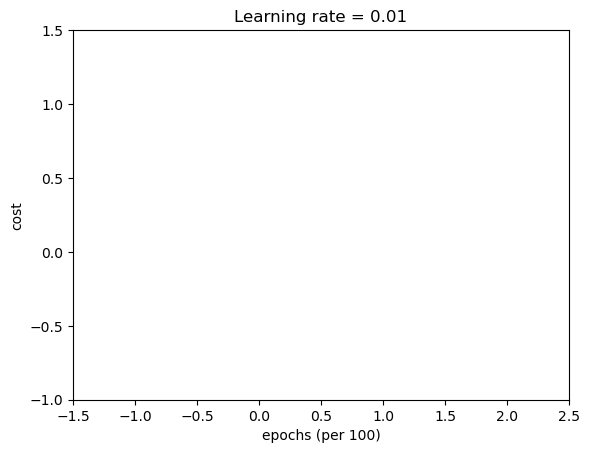

Accuracy: 0.49763033175355453


(-1.0, 1.5)

In [23]:
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd", learning_rate = 0.01, num_epochs=1, decay=schedule_lr_decay)

predictions = predict(train_X, train_Y, parameters)

plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
# plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)